In [ ]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt
import numpy as np

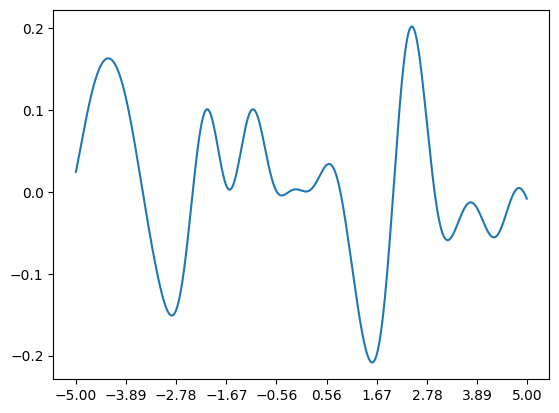

In [162]:
n = 100
a = torch.normal(0, 3, size=(n,1))
b = torch.empty(n,1).uniform_(-10, 10)
w = torch.empty(n,1).uniform_(0, 1)
w /= w.sum()
def f(x):
    # w1 sin(a1 x + b1) + ... + wn sin(an x + bn)
    if x.dim() == 1: x = x.unsqueeze(0)
    y = (w * torch.sin(a * x + b)).sum(dim=0)
    return y

xs = torch.arange(-5, 5, 0.01)
ys = f(xs)
plt.plot(xs, ys)
plt.xticks(np.linspace(-5, 5, 10))
plt.show()

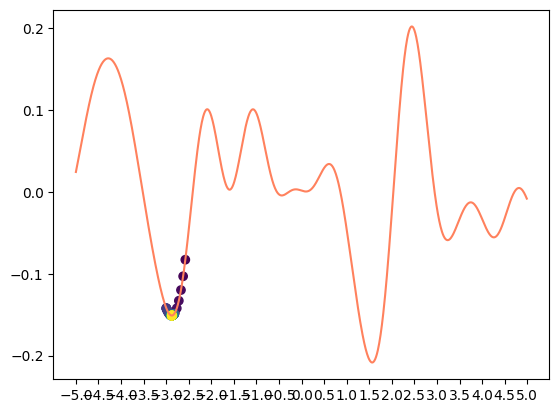

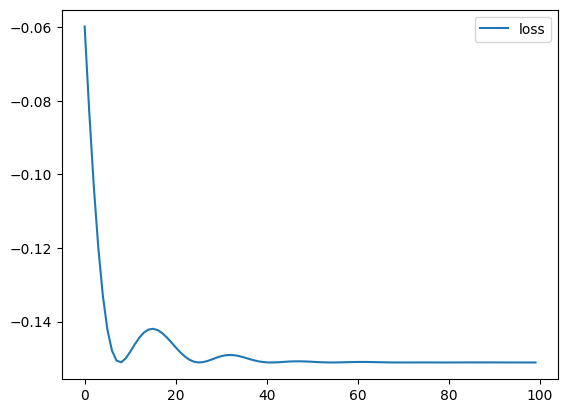

In [ ]:
theta = torch.empty(1).uniform_(-5, 5)
theta.requires_grad_(True)
optimizer = torch.optim.AdamW([theta], lr=0.05)

n_epochs = 100
thetas = []
losses = []
steps = []

for i in range(n_epochs):
    loss = f(theta)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print(f"Epoch {i}: loss={loss.item()}")
    steps.append(i)
    thetas.append(theta.item())
    losses.append(loss.item())

fthetas = f(torch.tensor(thetas))
plt.plot(xs := torch.arange(-5, 5, 0.01), f(xs), c='#FF815D')

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(thetas)))
plt.scatter(thetas, fthetas, c=colors)
plt.xticks(np.linspace(-5, 5, 21))  # Increase number of xticks
plt.show()

plt.plot(steps, losses, label="loss"); plt.legend(); plt.show()

In [151]:
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ],
       [0.273809, 0.031497, 0.358853, 1.      ],
       [0.276022, 0.044167, 0.370164, 1.      ],
       [0.278791, 0.062145, 0.386592, 1.      ],
       [0.280267, 0.073417, 0.397163, 1.      ],
       [0.281924, 0.089666, 0.412415, 1.      ],
       [0.28291 , 0.105393, 0.426902, 1.      ],
       [0.283197, 0.11568 , 0.436115, 1.      ],
       [0.283072, 0.130895, 0.449241, 1.      ],
       [0.282623, 0.140926, 0.457517, 1.      ],
       [0.281412, 0.155834, 0.469201, 1.      ],
       [0.279574, 0.170599, 0.479997, 1.      ],
       [0.278012, 0.180367, 0.486697, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.273006, 0.20452 , 0.501721, 1.      ],
       [0.269308, 0.218818, 0.509577, 1.      ],
       [0.26658 , 0.228262, 0.514349, 1.      ],
       [0.262138, 0.242286, 0.520837, 1.      ],
       [0.257322, 0.25613 , 0.526563, 1.      ],
       [0.253935, 0.